In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
data = pd.read_csv("/content/drive/MyDrive/dataset/AIES_HW_1/Dataset_III.csv")

In [69]:
data.head()

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee


In [70]:
data.describe()

,Volume (ml),Calories,Caffeine (mg)
count,610.000000,610.000000,610.000000
mean,346.543630,75.527869,134.693443
std,143.747738,94.799919,155.362861
min,7.393375,0.000000,0.000000
25%,236.588000,0.000000,50.000000
50%,354.882000,25.000000,100.000000
75%,473.176000,140.000000,160.000000
max,1419.528000,830.000000,1555.000000


Number of classes is  6
Energy Drinks    219
Coffee           173
Soft Drinks       90
Tea               66
Energy Shots      36
Water             26
Name: type, dtype: int64


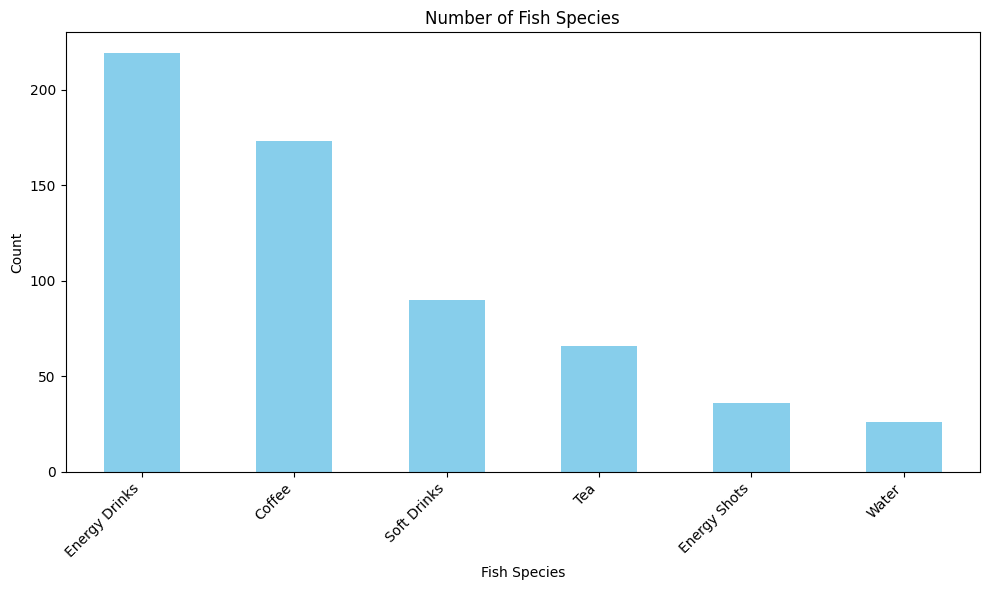

In [71]:
fish_counts = data['type'].value_counts()
print('Number of classes is ', len(fish_counts))
print(fish_counts)

plt.figure(figsize=(10, 6))
fish_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Fish Species')
plt.xlabel('Fish Species')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'Volume (ml)'}>,
        <Axes: title={'center': 'Calories'}>],
       [<Axes: title={'center': 'Caffeine (mg)'}>, <Axes: >]],
      dtype=object)

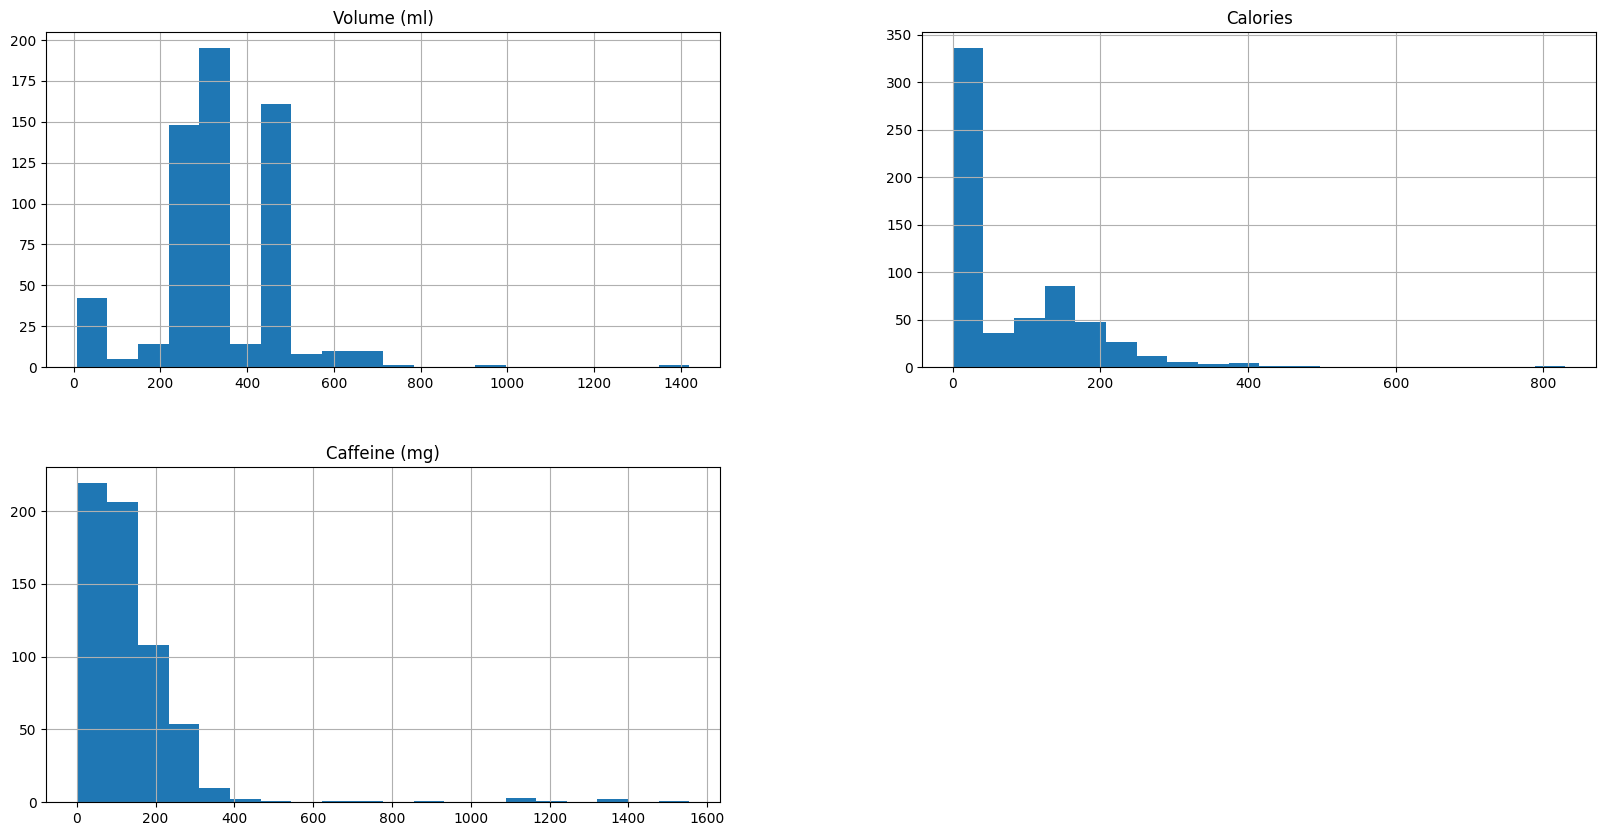

In [72]:
data.hist(bins=20, figsize=(20, 10))

In [73]:
# Splitting the dataset into features (X) and target variable (y)
X = data.drop(['drink','type'], axis=1)  # Features
y = data['type']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the range of K values to try
k_values = range(1, 20)  # Try K values from 1 to 20

# Dictionary to store F1 scores for each K value
f1_scores = {}
x = np.zeros(19)
# Loop through each K value
for k in k_values:
    # Create KNN classifier with current K value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform cross-validation with 5 folds
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1_macro')

    # Store the mean F1 score
    f1_scores[k] = np.mean(scores)
    x[k-1] = f1_scores[k]

# Find the best K value with the highest F1 score
best_k = max(f1_scores, key=f1_scores.get)
best_f1_score = f1_scores[best_k]

print("Best K value:", best_k)
print("F1 score with best K:", best_f1_score)

Best K value: 1
F1 score with best K: 0.6519831120313504


In [76]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train_scaled, y_train)
y_pred = knn1.predict(X_test)

f1_score = f1_score(y_test, y_pred, average='macro')
f1_score

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


0.15698587127158556

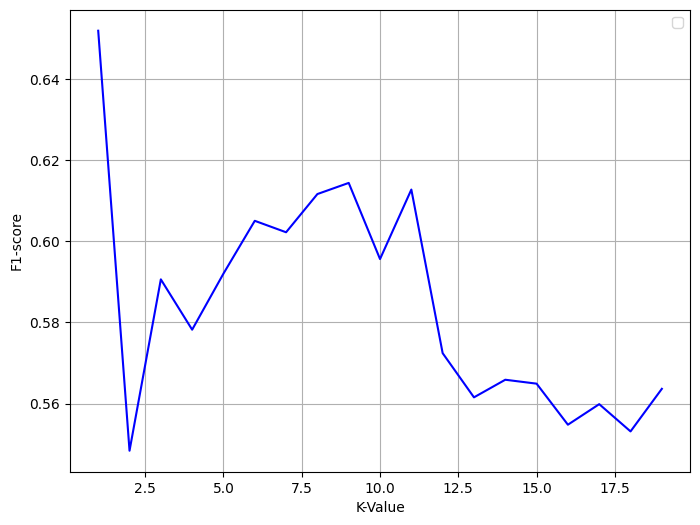

In [77]:
# Plotting
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), x, color='blue')
plt.xlabel('K-Value')
plt.ylabel('F1-score')
plt.legend()
plt.grid(True)
plt.show()